In [285]:
import avro.schema
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter
import os
import matplotlib.pyplot as plt
import pandas as pd
import ligo.skymap.plot
from matplotlib import pyplot as plt
from base64 import b64decode,b64encode,b16decode,decodebytes,encodebytes
from io import BytesIO
import mhealpy as hmap
from astropy.time import Time
from astropy.table import Table
from ligo.skymap.io.fits import read_sky_map,write_sky_map
import healpy as hp
from mhealpy import HealpixMap
import astropy.io.fits as fits
from astropy.table import QTable
import numpy as np
from astropy import units as u
import astropy_healpix as ah
import astropy.io
from numpy import exp
from mocpy import MOC
import base64
from io import BytesIO
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot
from matplotlib import pyplot as plt
import base64
from mhealpy import HealpixBase

In [307]:
t = read_sky_map("./../bayestarInjs/mock_simulations/MS250705owp/0.fits",moc=True)

## What does the 3I/ATLAS data look like?

In [253]:
def IndexToDeclRa(index,nside=2048):
    theta,phi=hp.pixelfunc.pix2ang(nside,index)
    return -np.degrees(theta-pi/2.),np.degrees(pi*2.-phi)

def thetaPhitoRADec(theta,phi):
    return -np.degrees(theta-np.pi/2.),np.degrees(np.pi*2.-phi)

def DeclRaToIndex(decl,RA,nside=2048):
    return hp.pixelfunc.ang2pix(nside,np.radians(-decl+90.),np.radians(RA))

def healpix_map_to_base64(hpx_map: HealpixMap) -> str:
    # Step 1: Write to in-memory FITS buffer
    buffer = BytesIO()
    hpx_map.write_map(buffer)  # default is multi-order FITS

    # Step 2: Get raw bytes and encode
    binary_data = buffer.getvalue()
    encoded_string = binary_data

    return encoded_string

def base64_to_healpix_map(b64_str: str) -> HealpixMap:
    binary_data = base64.b64decode(b64_str)
    buffer = BytesIO(binary_data)
    return HealpixMap.read_map(buffer)

## Read in the avro

In [346]:
reader = avro.datafile.DataFileReader(open('/Users/sean/Downloads/S250328ae-initial.avro',"rb"),avro.io.DatumReader())
schema = reader.meta

In [347]:
for u in reader:
    a=u

In [348]:
fits.open(BytesIO(a["event"]["skymap"]))[1].data["PROBDENSITY"]

array([4.40216807e-60, 2.56539693e-57, 3.59927358e-58, ...,
       3.34327882e+02, 3.39611549e+02, 3.34771201e+02],
      shape=(19200,), dtype='>f8')

In [349]:
myMap = fits.open("../bayestarInjs/mock_simulations/MS250705ywu/0.fits")

In [351]:
hduList = fits.open(BytesIO(a["event"]["skymap"]),mode='update')

In [352]:
output_buffer = BytesIO()

In [353]:
myMap.writeto(output_buffer,overwrite=True)

In [354]:
myOutString = output_buffer.getvalue()

In [355]:
a["event"]["skymap"] = myOutString
a["superevent_id"] = "BrandNewTest9"
a["event"]["classification"]={'BNS': 0.99,'NSBH': 0.01,'BBH': 0.0,'Terrestrial': 0}
a["time_created"] = str(Time.now().isot)
a["event"]["properties"]["HasNS"]=0.6
a["event"]["properties"]["HasRemnant"] = 0.89

In [356]:
writer = DataFileWriter(open("testAv4.avro", "wb"), DatumWriter(), avro.schema.parse(schema['avro.schema']))
writer.append(a)
writer.close()

## Plot it

In [417]:
myMapFlattened = fits.open("../bayestarInjs/mock_simulations/MS250705xge/0_flatten.fits")

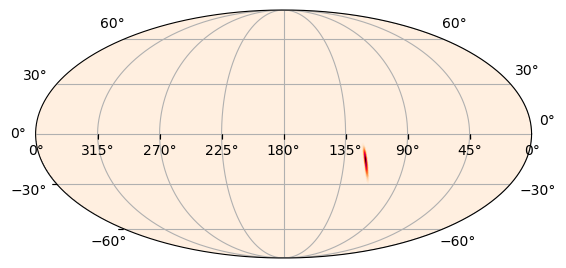

In [418]:
ax = plt.axes(projection='astro degrees mollweide')
ax.imshow_hpx(myMapFlattened[1], cmap='cylon')
# ax.contour_hpx(myMapFlattened[1],levels=50,nested=True)
# ax.contour_hpx(myMapFlattened[1],levels=90,nested=True)
ax.grid()